In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

df = pd.read_csv("dataset_clean_2.csv")

df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.index = df.index.normalize()

average_price_last_month = 10000

ma_liste = df['Area'].unique()
dropdown1 = widgets.Dropdown(
    options = ma_liste,
    value = ma_liste[0],
    description = 'Choice area:',
)

global area
area = ma_liste[0]

def on_change1(change):
    global area
    if change['name'] == 'value' and (change['new'] != change['old']):
        area = change['new']
        print(area)

dropdown1.observe(on_change1)

display(dropdown1)

ma_liste2 = df['Nearest Metro'].unique()
dropdown2 = widgets.Dropdown(
    options = ma_liste2,
    value = ma_liste2[0],
    description = 'Choice nearest metro:',
)

global metro
metro = ma_liste2[0]

def on_change2(change):
    global metro
    if change['name'] == 'value' and (change['new'] != change['old']):
        metro = change['new']
        print(metro)

dropdown2.observe(on_change2)

display(dropdown2)

ma_liste3 = df['Room(s)'].unique()
dropdown3 = widgets.Dropdown(
    options = ma_liste3,
    value = ma_liste3[0],
    description = 'Choice flat type',
)

global room
room = ma_liste3[0]

def on_change3(change):
    global room
    if change['name'] == 'value' and (change['new'] != change['old']):
        room = change['new']
        print(room)

dropdown3.observe(on_change3)

display(dropdown3)

ma_liste4 = df['Nearest Mall'].unique()
dropdown4 = widgets.Dropdown(
    options = ma_liste4,
    value = ma_liste4[0],
    description = 'Choice flat type',
)

global mall
mall = ma_liste4[0]

def on_change4(change):
    global mall
    if change['name'] == 'value' and (change['new'] != change['old']):
        mall = change['new']
        print(mall)

dropdown4.observe(on_change4)

display(dropdown4)

ma_liste5 = df['Nearest Landmark'].unique()
dropdown5 = widgets.Dropdown(
    options = ma_liste5,
    value = ma_liste5[0],
    description = 'Choice nearest landmark',
)

global landmark
landmark = ma_liste5[0]

def on_change5(change):
    global landmark
    if change['name'] == 'value' and (change['new'] != change['old']):
        landmark = change['new']
        print(landmark)

dropdown5.observe(on_change5)

display(dropdown5)

global transaction_size
transaction_size = 0

def on_change6(change):
    global transaction_size
    if change['name'] == 'value' and (change['new'] != change['old']):
        try:
            transaction_size = float(change['new'])
            print(transaction_size)
        except ValueError:
            print("Please enter a number")

text = widgets.Text(
    value=str(transaction_size),
    description='transaction size :',
)
text.observe(on_change6, 'value')

display(text)

global property_size
property_size = 0

def on_change7(change):
    global property_size
    if change['name'] == 'value' and (change['new'] != change['old']):
        try:
            property_size = float(change['new'])
            print(property_size)
        except ValueError:
            print("Please enter a number")

text = widgets.Text(
    value=str(property_size),
    description='property size :',
)
text.observe(on_change7, 'value')

display(text)


Dropdown(description='Choice area:', options=('PALM JUMEIRAH', 'JUMEIRAH VILLAGE CIRCLE', 'BURJ KHALIFA', 'JUM…

Dropdown(description='Choice nearest metro:', options=('Palm Jumeirah', 'Nakheel Metro Station', 'Buj Khalifa …

Dropdown(description='Choice flat type', options=('2 B/R', 'Studio', '1 B/R', '3 B/R', '5 B/R', '4 B/R', 'PENT…

Dropdown(description='Choice flat type', options=('Marina Mall', 'Dubai Mall', 'Mall of the Emirates', nan, 'C…

Dropdown(description='Choice nearest landmark', options=('Burj Al Arab', 'Sports City Swimming Academy', 'Down…

Text(value='0', description='transaction size :')

Text(value='0', description='property size :')

BURJ KHALIFA
Buj Khalifa Dubai Mall Metro Station
4 B/R
Dubai Mall
Burj Khalifa
Please enter a number
1.0
12.0
120.0
Please enter a number
1.0
12.0
120.0


In [ ]:
print(average_price_last_month)
print(area)
print(metro)
print(room)
print(mall)
print(landmark)
print(transaction_size)
print(property_size)

10000
BURJ KHALIFA
Buj Khalifa Dubai Mall Metro Station
4 B/R
Dubai Mall
Burj Khalifa
120.0
120.0


In [ ]:
df = pd.get_dummies(df, columns=[
'Nearest Metro',
'Area',
'Nearest Mall',
'Nearest Landmark',
'Room(s)',
])
df = df.dropna()
df = df.drop(['Unnamed: 0'] ,axis=1)
df.reset_index(drop=True, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

X = df.head(1000).drop(['Price'], axis=1)
y = df.head(1000)['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train.ravel())

y_pred = model.predict(X_test)

In [ ]:
import pickle
with open('dubai_real_estate_property_sell_price_estimation_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Modèle enregistré avec succès")

Modèle enregistré avec succès


In [ ]:
test_2 = ['Area_'+area, 'Nearest Metro_'+metro, 'Room(s)_'+room, 'Nearest Mall_'+mall, 'Nearest Landmark_'+landmark]
test = np.zeros(134)
for i in range(len(test_2)):
    test[np.where(np.array(list(X_test.keys())) == test_2[i])] = 1

test[0] = transaction_size
test[1] = property_size
test[2] = average_price_last_month

test

array([1.2e+02, 1.2e+02, 1.0e+04, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e

Reading local file
Saving results in logistic_regression.pdf
Reading local file


C:\Users\tom36\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


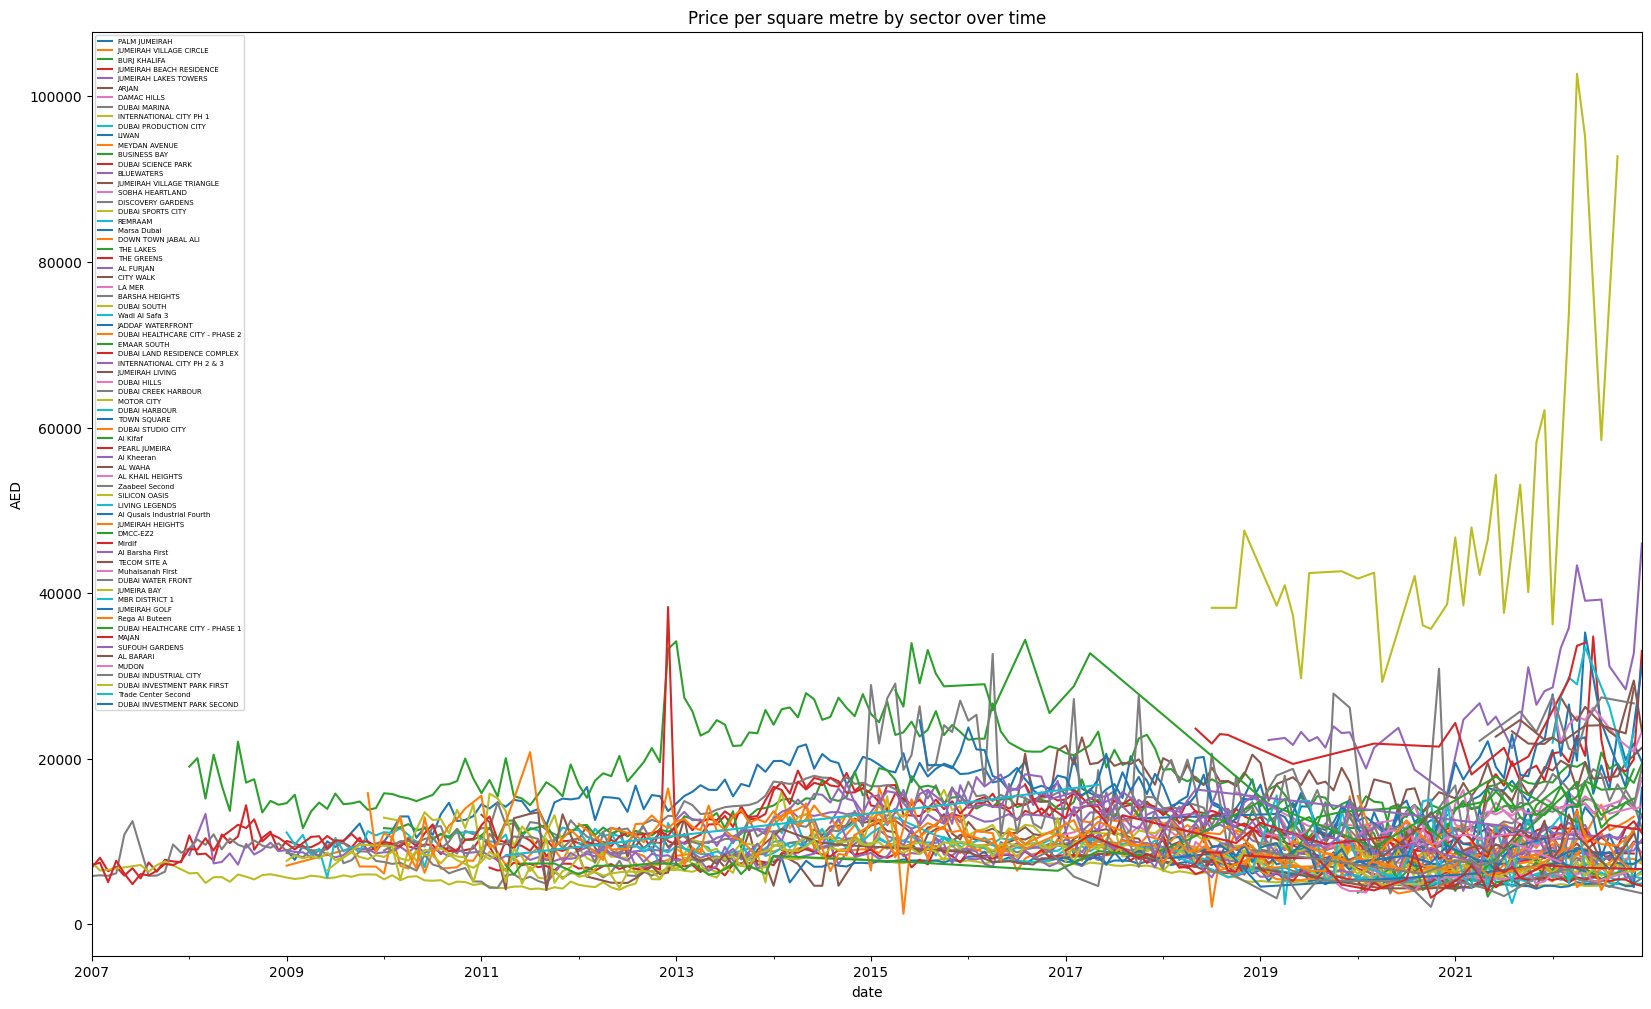

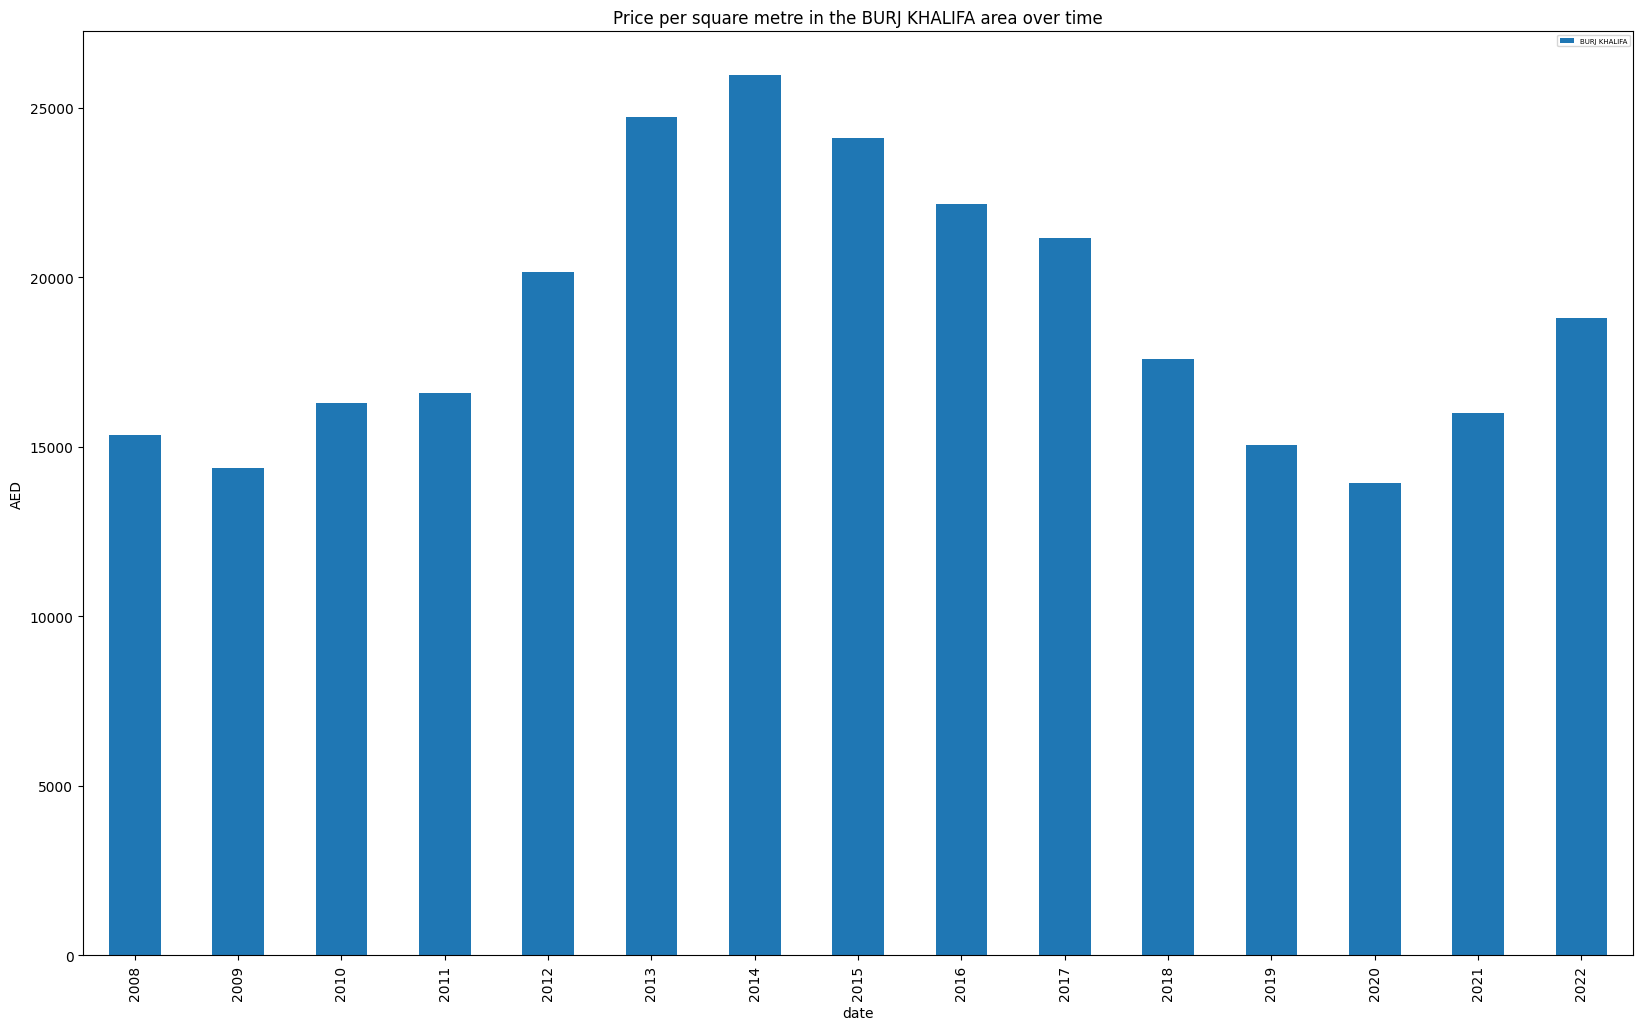

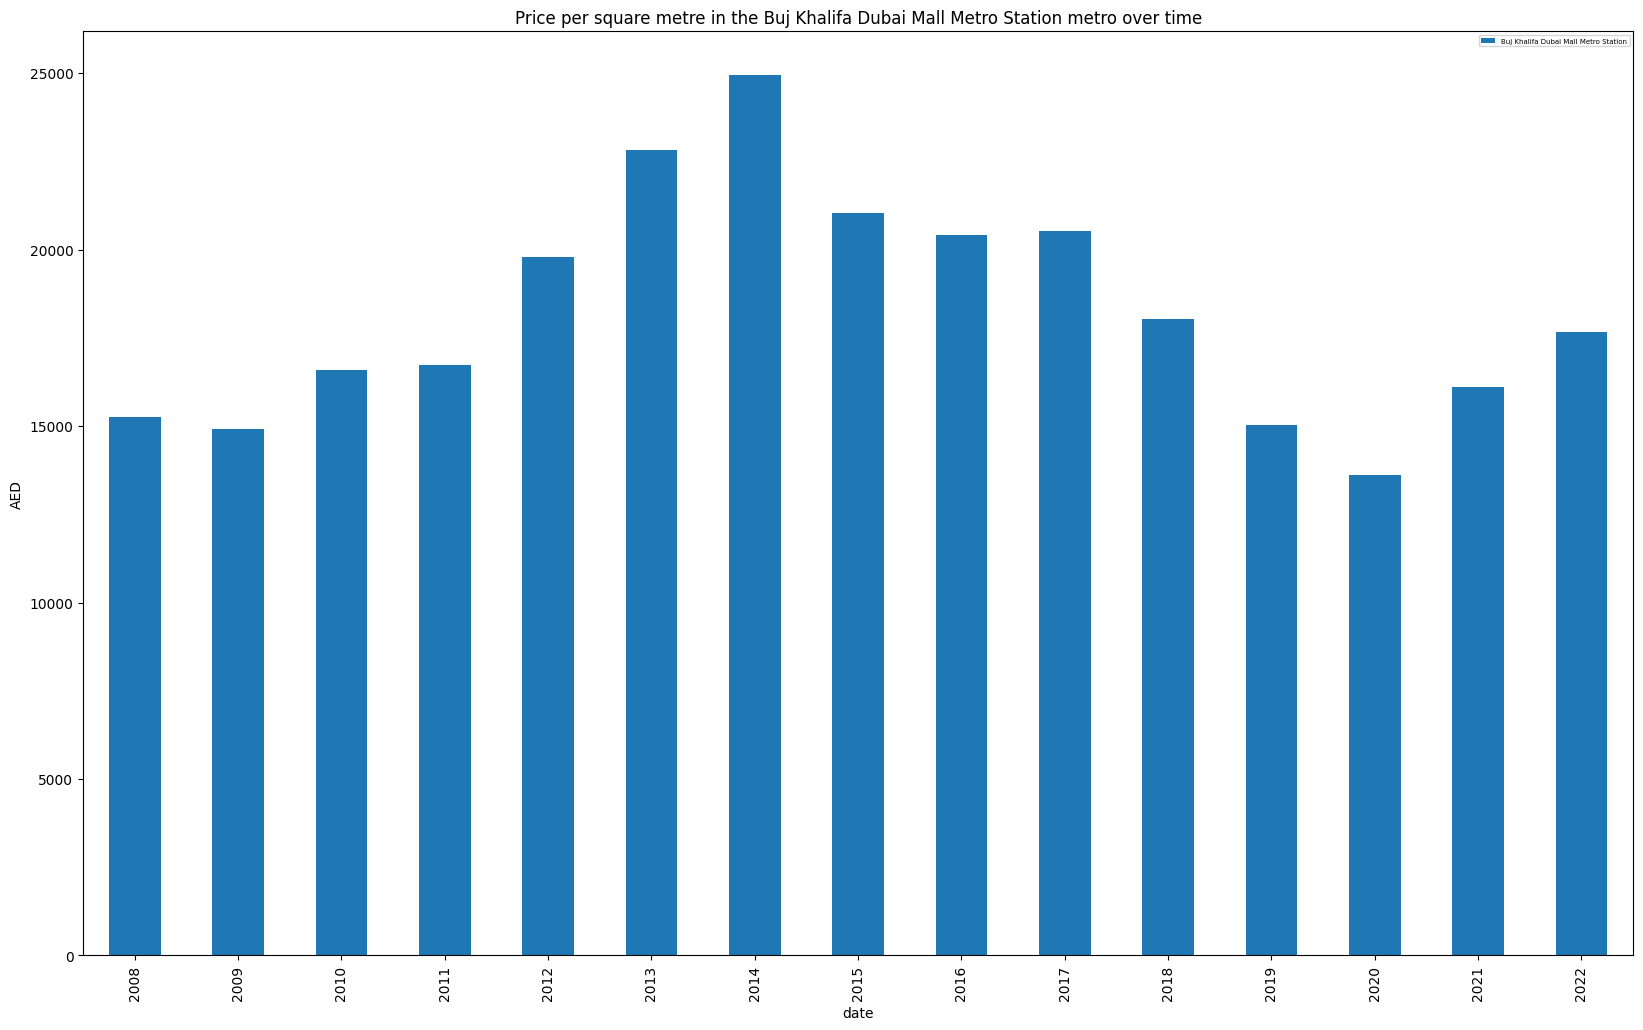

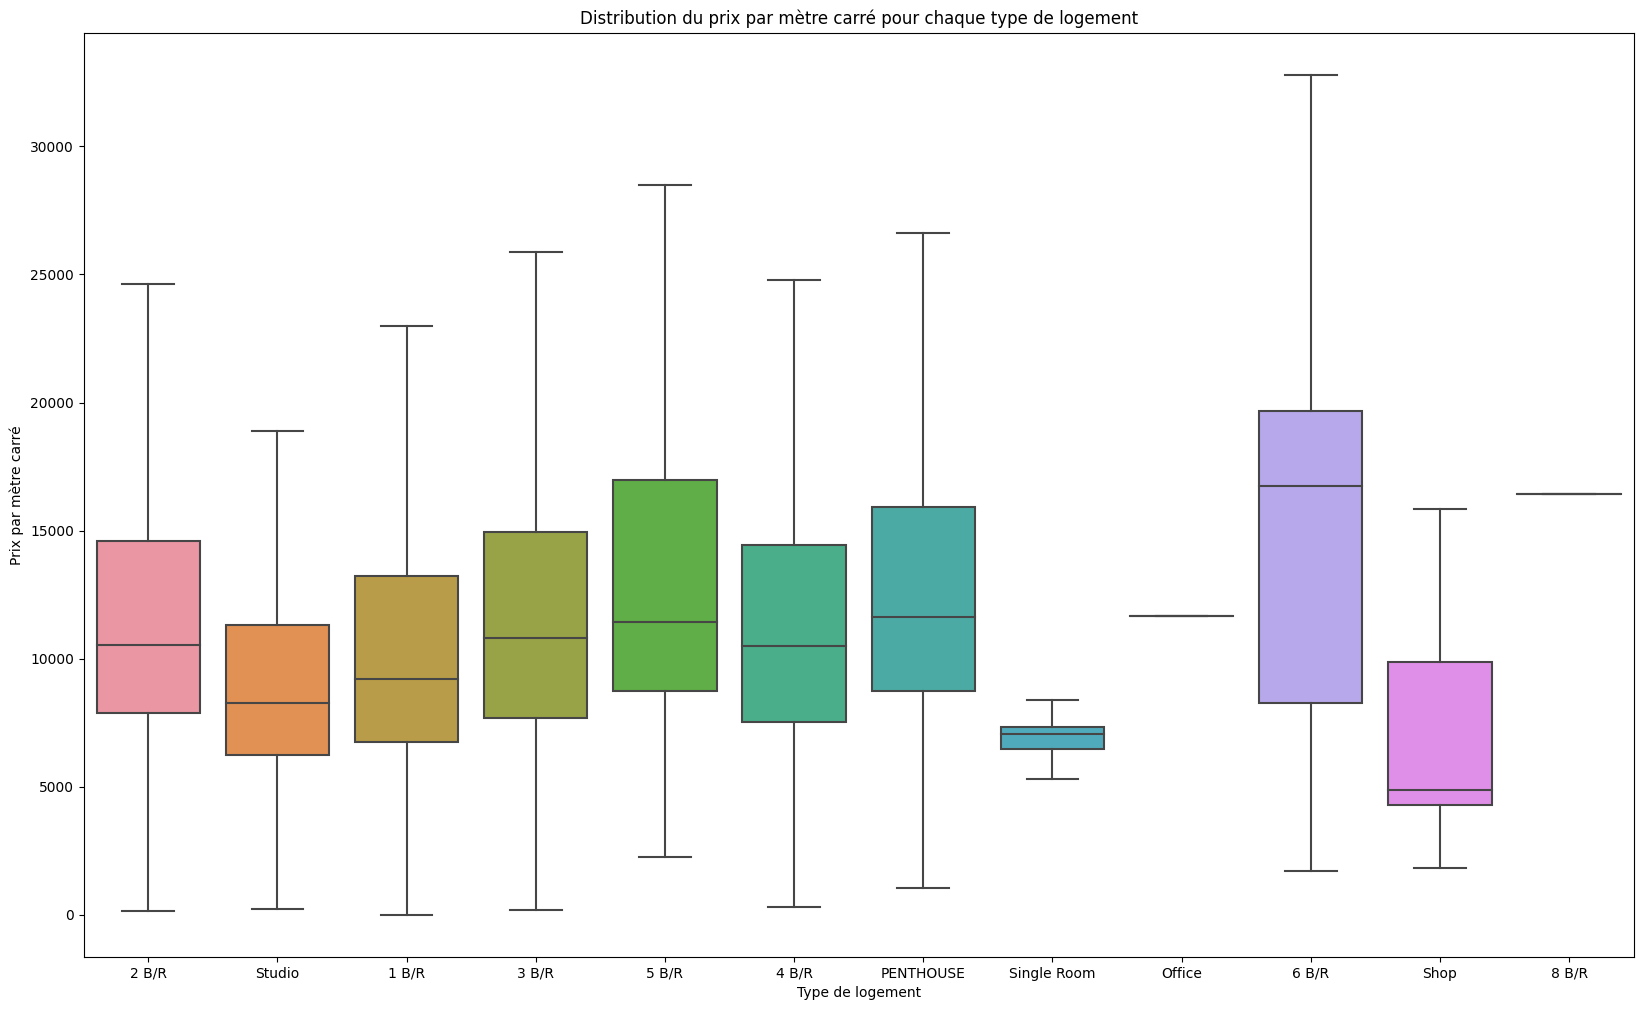

In [ ]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.platypus import SimpleDocTemplate, Paragraph, Image, Table, PageBreak
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib import utils
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import seaborn as sns
import json
import os
import sys



def get_input(local=False):
    if local:
        print("Reading local file")

        return "dataset_clean_2.csv"

    dids = os.getenv("DIDS", None)

    if not dids:
        print("No DIDs found in environment. Aborting.")
        return

    dids = json.loads(dids)

    for did in dids:
        filename = f"data/inputs/{did}/0"  # 0 for metadata service
        print(f"Reading asset file {filename}.")

        return filename

def run_linear_regression(local=False):
    filename = get_input(local)
    if not filename:
        print("Could not retrieve filename.")
        return

    filename = "logistic_regression.pdf" if local else "/data/outputs/result"
    with open(filename, "wb") as pdf_file:
        print(f"Saving results in {filename}")
        create_pdf(pdf_file)


def create_pdf(pdf_file):
    def create_header(canvas, doc):
        canvas.saveState()
        canvas.drawImage("ez.jpg", doc.width + 70, doc.height + 70, width=40, height=40)
        canvas.restoreState()

    doc = SimpleDocTemplate(pdf_file, pagesize=letter)
    story = []
    styles = getSampleStyleSheet()

    filename = get_input(local)
    if not filename:
        print("Could not retrieve filename.")
        return


    # Obtenir les styles existants
    styles = getSampleStyleSheet()

    # Créer un nouveau style pour le titre
    styles.add(ParagraphStyle(name='Title_2',
                          fontSize=20,
                          alignment=1,  # 1 pour centré
                          textColor='black',
                          spaceAfter=12,  # Espace après le paragraphe
                          leading=30,  # Espace entre les lignes du paragraphe
                          bold=True))

    styles.add(ParagraphStyle(name='Title_4',
                          fontSize=14,
                          alignment=1,  # 1 pour centré
                          textColor='black',
                          spaceAfter=12,  # Espace après le paragraphe
                          leading=30,  # Espace entre les lignes du paragraphe
                          bold=True))


    title_text = "Dubai real estate report"
    title_para = Paragraph(title_text, styles['Title_2'])
    story.append(title_para)


    z_text = f"This report provides a comprehensive overview of the Dubai market over time for these parameters:"
    z_para = Paragraph(z_text, styles["Normal"])
    story.append(z_para)


    z_text = f"Area: {area}"
    z_para = Paragraph(z_text, styles["Normal"])
    story.append(z_para)

    z_text = f"Property Size (m²): {property_size}"
    z_para = Paragraph(z_text, styles["Normal"])
    story.append(z_para)

    z_text = f"Nearest Metro: {metro}"
    z_para = Paragraph(z_text, styles["Normal"])
    story.append(z_para)

    z_text = f"Nearest Mall: {mall}"
    z_para = Paragraph(z_text, styles["Normal"])
    story.append(z_para)

    z_text = f"Nearest Landmark: {landmark}"
    z_para = Paragraph(z_text, styles["Normal"])
    story.append(z_para)

    z_text = f"Flat type: {room}<br/><br/><br/><br/><br/><br/>"
    z_para = Paragraph(z_text, styles["Normal"])
    story.append(z_para)

    # Créer une table des matières
    toc = [["Table of contents"],
           ["Introduction", "..............................................................", "1"],
           ["Price estimation", "..............................................................", "2"],
           ["Graph 1", "..............................................................", "3"],
           ["Graph 2", "..............................................................", "5"],
           ["Graph 3", "..............................................................", "6"],
           ["Graph 4", "..............................................................", "7"],
           ["Conclusion", "..............................................................", "8"]]

    # Ajouter la table des matières à l'histoire
    table = Table(toc)
    story.append(table)

    story.append(PageBreak())

    title_text = "Price estimation"
    title_para = Paragraph(title_text, styles['Title_4'])
    story.append(title_para)

    text = f"Price estimation of the model for the flat: {model.predict(test.reshape(1, -1))[0]} AED."
    para = Paragraph(text, styles["Normal"])
    story.append(para)

    story.append(PageBreak())

    title_text = "Introduction"
    title_para = Paragraph(title_text, styles['Title_4'])
    story.append(title_para)

    text = "This comprehensive report delves into the dynamic trajectory of the real estate landscape in Dubai, meticulously analyzing developments since the pivotal year of 2007. Drawing upon a wealth of data sourced directly from the Government of the United Arab Emirates, this report serves as an invaluable resource, empowering individuals with a profound understanding of the distinctive features shaping the Dubai property market. Our primary objective is to furnish readers with insights that not only elucidate the market's intricacies but also foster informed decision-making in the realm of property acquisition.Within these pages, you will find a nuanced exploration of key trends, regulatory shifts, and influential factors that have steered the evolution of Dubai's real estate sector. Additionally, this report goes beyond mere observation by incorporating our advanced modeling techniques, offering estimations of property prices based on user input. By amalgamating data-driven analysis with user-centric perspectives, we aspire to equip our readers with a holistic view of the Dubai property market, ultimately empowering them to make well-informed and strategic investment decisions."
    para = Paragraph(text, styles["Normal"])
    story.append(para)

    story.append(PageBreak())

    title_text = "Graph 1"
    title_para = Paragraph(title_text, styles['Title_4'])
    story.append(title_para)

    df = pd.read_csv(filename, sep=',')
    df
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    df.index = df.index.normalize()

    df['price_per_m2'] = df['Price'] / df['Transaction Size (sq.m)']

    df_grouped = df.groupby(['Area', df.index.to_period('M')])['price_per_m2'].mean()

    fig, ax = plt.subplots(figsize=(20, 12))

    for zone in df['Area'].unique():
        df_grouped[zone].plot(ax=ax, label=zone)

    ax.set_title('Price per square metre by sector over time')
    ax.set_ylabel('AED')

    ax.legend(fontsize=5)

    imgdata = io.BytesIO()
    plt.savefig(imgdata, format='png', dpi=300)
    imgdata.seek(0)

    img = Image(imgdata, width=500, height=300)
    story.append(img)

    story.append(PageBreak())

    title_text = "Graph 2"
    title_para = Paragraph(title_text, styles['Title_4'])
    story.append(title_para)

    df_grouped = df.groupby(['Area', df.index.to_period('Y')])['price_per_m2'].mean()
    fig, ax = plt.subplots(figsize=(20, 12))
    df_grouped[area].plot(kind='bar', ax=ax, label=area)
    ax.set_title('Price per square metre in the ' + area + ' area over time')
    ax.set_ylabel('AED')
    ax.legend(fontsize=5)

    imgdata = io.BytesIO()
    plt.savefig(imgdata, format='png', dpi=300)
    imgdata.seek(0)

    img = Image(imgdata, width=500, height=300)
    story.append(img)

    story.append(PageBreak())

    title_text = "Graph 3"
    title_para = Paragraph(title_text, styles['Title_4'])
    story.append(title_para)

    df_grouped = df.groupby(['Nearest Metro', df.index.to_period('Y')])['price_per_m2'].mean()
    fig, ax = plt.subplots(figsize=(20, 12))
    df_grouped[metro].plot(kind='bar', ax=ax, label=metro)
    ax.set_title('Price per square metre in the ' + metro + ' metro over time')
    ax.set_ylabel('AED')
    ax.legend(fontsize=5)

    imgdata = io.BytesIO()
    plt.savefig(imgdata, format='png', dpi=300)
    imgdata.seek(0)

    img = Image(imgdata, width=500, height=300)
    story.append(img)

    story.append(PageBreak())

    title_text = "Graph 4"
    title_para = Paragraph(title_text, styles['Title_4'])
    story.append(title_para)

    premieres_zones = df['Room(s)'].value_counts().index[:]
    df_filtre = df[df['Room(s)'].isin(premieres_zones)]

    plt.figure(figsize=(20, 12))
    sns.boxplot(x='Room(s)', y='price_per_m2', data=df_filtre, showfliers=False)
    plt.xlabel('Type de logement')
    plt.ylabel('Prix par mètre carré')
    plt.title('Distribution du prix par mètre carré pour chaque type de logement')

    imgdata = io.BytesIO()
    plt.savefig(imgdata, format='png', dpi=300)
    imgdata.seek(0)

    img = Image(imgdata, width=500, height=300)

    story.append(img)

    story.append(PageBreak())

    title_text = "Conclusion"
    title_para = Paragraph(title_text, styles['Title_4'])
    story.append(title_para)

    text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed ac quam sed justo varius sollicitudin. Praesent euismod augue nec sem scelerisque, sit amet hendrerit elit laoreet. Phasellus luctus consequat velit, vitae dignissim lacus fermentum at. Sed in aliquet velit. Integer volutpat ligula nec mi facilisis, non ultricies odio euismod. Sed in est vitae nisi cursus tincidunt. Fusce scelerisque justo et facilisis commodo. Vivamus eu rhoncus elit. Sed ullamcorper leo a metus congue, a fermentum metus bibendum. Duis quis libero sed justo malesuada tristique id at justo. Nulla facilisi. Integer nec efficitur justo. Nulla facilisi. Sed euismod purus nec massa bibendum, vel cursus felis feugiat."
    para = Paragraph(text, styles["Normal"])
    story.append(para)

    doc.build(story, onFirstPage=create_header, onLaterPages=create_header)

if __name__ == '__main__':
    local = True
    run_linear_regression(local)